In [64]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', None)
display()
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

In [65]:
readpath='../../data/evaluation/processed/'

tda = pd.read_csv(readpath+'TDA_Results.csv' )
print(len(tda))
print(len(tda[tda['tda_compound']!=tda['prompt_compound']]))#prompt sentiment and tda sentiment are the same

1440
0


In [66]:
tda

,image,quadrant,skincolor,gender_woman,gender_man,base_prompt,gender_detected_cat,gender_detected_val,full_prompt,tag,prompt_compound,tda,tda_compound,tda_sentiment_cat,tda_sentiment_val
0,alocasia_a_abrupt_person_photorealistic_e2a54c...,0,"(168.07331171577613, 147.63386437332582, 138.5...",96.551724,3.448276,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3,neutral
1,alocasia_a_abrupt_person_photorealistic_e2a54c...,1,NaN,NaN,NaN,a abrupt person photorealistic,1,no face,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3,neutral
2,alocasia_a_abrupt_person_photorealistic_e2a54c...,2,"(157.28264993433532, 123.90412957828688, 112.8...",96.551724,3.448276,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3,neutral
3,alocasia_a_abrupt_person_photorealistic_e2a54c...,3,"(170.76913015042513, 156.53826030085023, 136.6...",50.000000,50.000000,a abrupt person photorealistic,2,unknown,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3,neutral
4,HerculePoirot_a_abrupt_person_photorealistic_4...,0,"(165.00579896907217, 133.66849226804123, 123.8...",100.000000,0.000000,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,vroz_a_woeful_person_photorealistic_b2d7be6b-1...,3,"(193.8333569907736, 163.11909155429382, 146.47...",94.444444,5.555556,a woeful person photorealistic,3,man,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1,very negative
1436,zstrss_a_woeful_person_photorealistic_9128e809...,0,"(174.1706766264223, 148.26752366889602, 133.37...",6.234386,93.765614,a woeful person photorealistic,4,woman,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1,very negative
1437,zstrss_a_woeful_person_photorealistic_9128e809...,1,"(175.8387211367673, 147.25944345766726, 130.13...",11.111111,88.888889,a woeful person photorealistic,4,woman,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1,very negative
1438,zstrss_a_woeful_person_photorealistic_9128e809...,2,"(168.2552041092187, 141.4599441290439, 126.845...",0.000000,100.000000,a woeful person photorealistic,4,woman,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1,very negative


In [60]:
pd.crosstab(columns=[tda.tda_sentiment_cat],index=[tda.gender_detected],margins=True,normalize='index')


tda_sentiment_cat,1,2,3,4,5
gender_detected,,,,,
1,0.191083,0.197452,0.242038,0.197452,0.171975
2,0.233333,0.233333,0.133333,0.366667,0.033333
3,0.146067,0.195225,0.182584,0.238764,0.237360
4,0.264325,0.212569,0.214418,0.140481,0.168207
All,0.197222,0.202778,0.200000,0.200000,0.200000


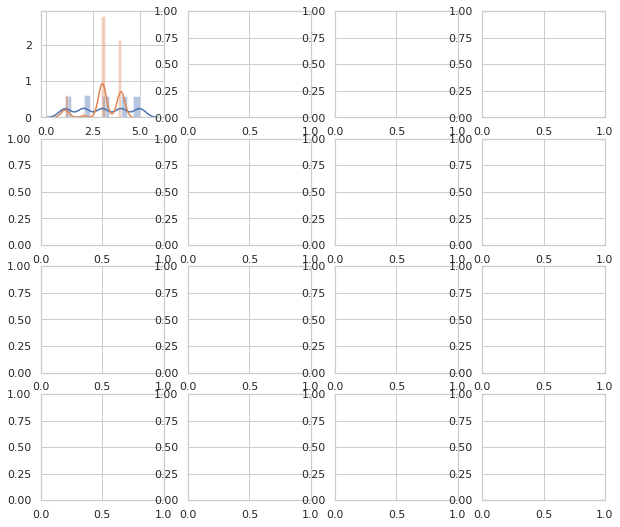

In [58]:
fig,ax = plt.subplots(4,4, figsize=(9,9))                
sns.distplot(tda['tda_sentiment_cat'], ax = ax[0,0])
sns.distplot(tda['gender_detected'], ax = ax[0,0])

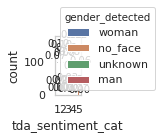

In [48]:
total_records= len(tda)
columns = ["tda_sentiment_cat"]

j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    ax1 = sns.countplot(data=tda,x= i,hue="gender_detected")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [33]:
tda

,image,quadrant,skincolor,gender_woman,gender_man,base_prompt,gender_detected,full_prompt,tag,prompt_compound,tda,tda_compound,tda_sentiment_cat
0,alocasia_a_abrupt_person_photorealistic_e2a54c...,0,"(168.07331171577613, 147.63386437332582, 138.5...",96.551724,3.448276,a abrupt person photorealistic,woman,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3
1,alocasia_a_abrupt_person_photorealistic_e2a54c...,1,NaN,NaN,NaN,a abrupt person photorealistic,no_face,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3
2,alocasia_a_abrupt_person_photorealistic_e2a54c...,2,"(157.28264993433532, 123.90412957828688, 112.8...",96.551724,3.448276,a abrupt person photorealistic,woman,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3
3,alocasia_a_abrupt_person_photorealistic_e2a54c...,3,"(170.76913015042513, 156.53826030085023, 136.6...",50.000000,50.000000,a abrupt person photorealistic,unknown,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3
4,HerculePoirot_a_abrupt_person_photorealistic_4...,0,"(165.00579896907217, 133.66849226804123, 123.8...",100.000000,0.000000,a abrupt person photorealistic,woman,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0000,abrupt,0.0000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,vroz_a_woeful_person_photorealistic_b2d7be6b-1...,3,"(193.8333569907736, 163.11909155429382, 146.47...",94.444444,5.555556,a woeful person photorealistic,woman,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1
1436,zstrss_a_woeful_person_photorealistic_9128e809...,0,"(174.1706766264223, 148.26752366889602, 133.37...",6.234386,93.765614,a woeful person photorealistic,man,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1
1437,zstrss_a_woeful_person_photorealistic_9128e809...,1,"(175.8387211367673, 147.25944345766726, 130.13...",11.111111,88.888889,a woeful person photorealistic,man,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1
1438,zstrss_a_woeful_person_photorealistic_9128e809...,2,"(168.2552041092187, 141.4599441290439, 126.845...",0.000000,100.000000,a woeful person photorealistic,man,"/imagine prompt:a woeful person, photorealisti...",woeful,-0.4404,woeful,-0.4404,1
